In [ ]:
import os.path as path
import raw_data_preprocessing as rdp
import warnings
import regressor as reg
import cluster as clu
import intervention_data_preprocessing as idp
import individual_differences_plot as plot
warnings.filterwarnings('ignore')

googledrive_loc = '/datasets/googledrive'
data_folder_loc = 'Yi_UCI_research/GSR other works/2020 Summer_predict individual training/data/'
file_name = 'raw data/yi feng larger dataset_new.csv'
data_path = path.join(googledrive_loc, data_folder_loc, file_name)
raw_data = rdp.read_raw_data(data_path)
print('Used Feature columns: {}'.format(rdp.feature_col_names))
data_no_missing = rdp.delete_missing_row(raw_data)
# rdp.demographic_info(data_no_missing)
# rdp.descriptive_info(data_no_missing)

Used Feature columns: ['z_Updating_pre', 'z_WM_pre', 'z_IC_pre', 'MRpre', 'TCA', 'CFQ', 'z_Grit_Ambition', 'Person_emot', 'Person_extraver', 'Person_opennes', 'Person_agreeable', 'Person_conscien', 'VGQ_pastyear', 'z_SES']
The sample size of raw data is 392.
The sample size of no missing data is 363.


In [ ]:
int_test = idp.InterventionProcessor(data_no_missing)
int_test.basic_analyze()
int_test.mark_outlier_stewd(['std','max'])
int_test.delete_outlier()
piece_lin_reg = reg.PiecewiselinRegressor(['knot', 'slope1', 'slope2','turning_value'])
log_lin_reg = reg.LogRegressor(['log_slope', 'log_bias'])
lin_reg = reg.LinearRegressor(['linear_slope', 'linear_bias'])
int_test.register_regressor(piece_lin_reg)
int_test.fit()
# plot.plot_distribution(int_test.data, ['knot','slope1','slope2','std','max','r2'])

The mean of max is 5.318 with sd 5.885
The mean of std is 0.923 with sd 1.785
The skew of std is 7.387
std:MC=0.192
interval of std is 2.7972694256620017 to -0.15328719937519236
          ID   WmeanN_1   WmeanN_2   WmeanN_3   WmeanN_4   WmeanN_5  \
68   IGTA108   4.618750  11.595745  12.223529   8.983359  11.188148   
111  RRTA111   4.643478   5.691265   6.327869   6.293395   7.587888   
171  RRTA112   3.288571   4.154074   4.498555   4.687055   9.390788   
200   RLB131   9.059113  10.766938   9.817927  10.956873  13.827957   
229   ILB205   3.147945   3.640827   4.560302   8.041775   9.454774   
230   ILB208  14.159151  35.433875  49.548303  60.698113  69.022388   
231   ILB209  11.587342  23.429688  26.316076  33.257703  42.155080   
260   RLB140   2.000000   4.082153   4.939655  15.221024  23.300771   
289  iSOL178   2.500000   2.990000   3.570000   4.080000   5.680000   
304   LOL125   4.110000   6.450000   9.120000   7.910000   9.370000   
344  RSOL133   2.600000   2.520000   2.81

The silhouette score of GaussianMixture(n_components=3, random_state=0) is: 0.533
Sample of each cluster: label
0    171
1     31
2    145
dtype: int64
The mean of each mixture component: [[-0.74145388 -0.7000437 ]
 [ 2.00494959  1.94467449]
 [ 0.33836596  0.30593136]]


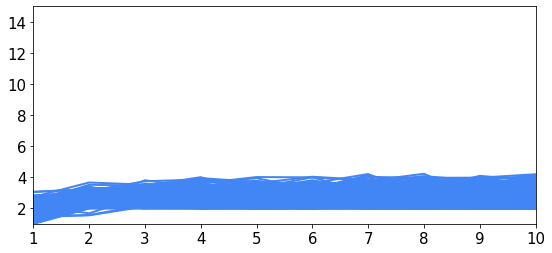

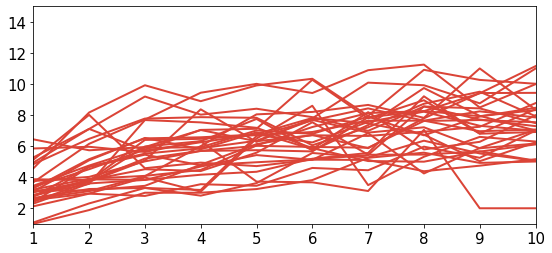

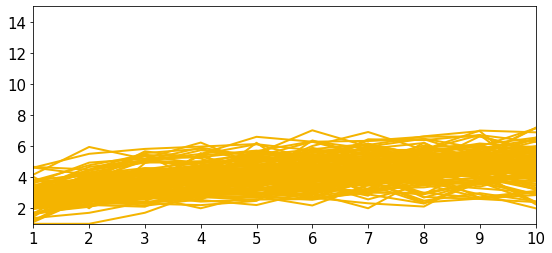

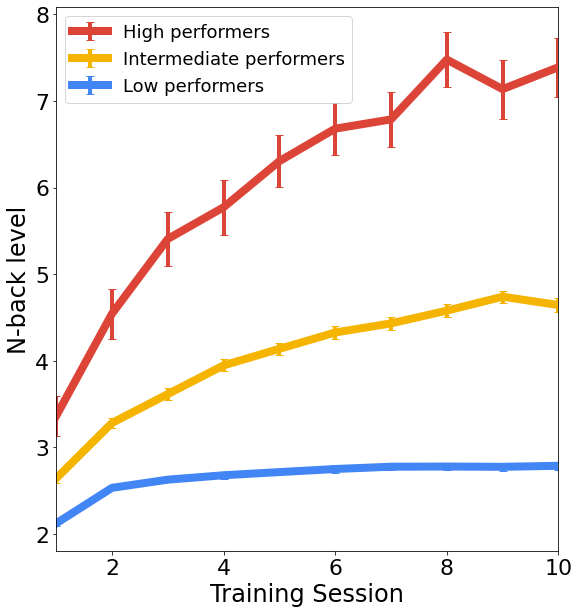

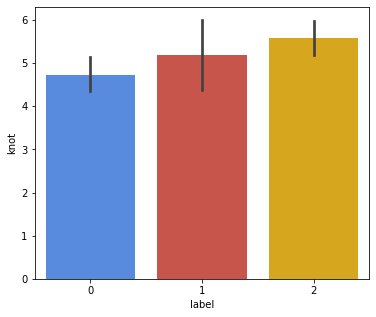

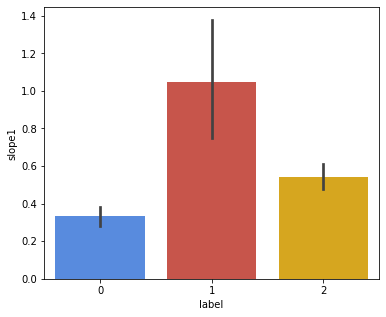

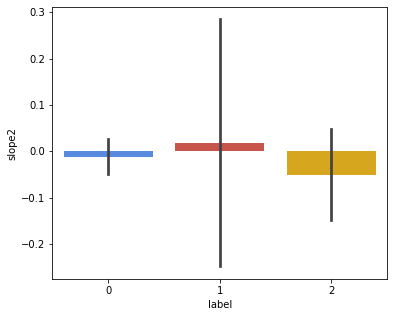

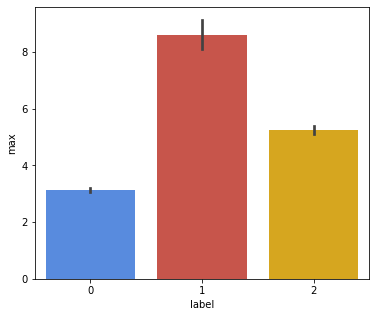

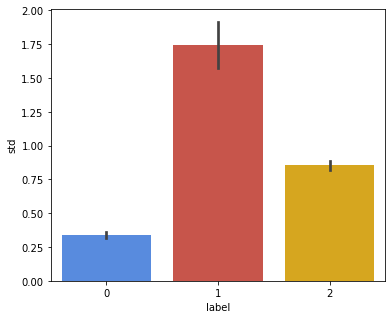

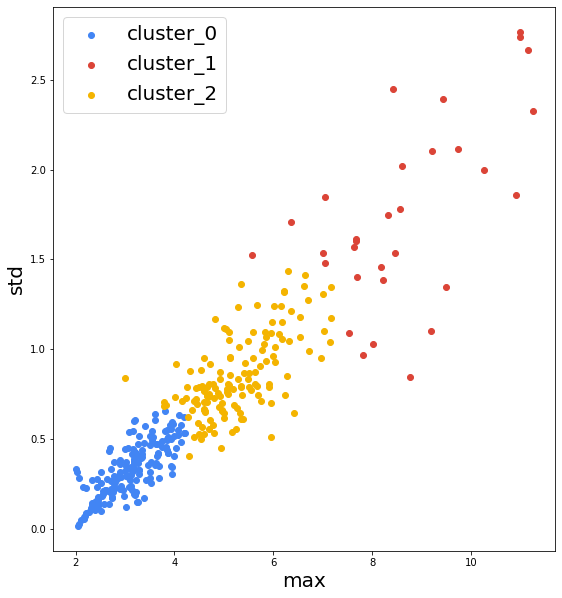

In [ ]:
# clustering
kmeans_3com = clu.Kmeans(3, ['knot', 'slope1'])
em_3com = clu.EM(3, ['max','std'])
int_test.register_cluster_model(em_3com)
int_test.cluster()
# plot
plot.plot_cluster_result(int_test.data, int_test.intervention_col_names, 'label')
plot.bar_plot_cluster(int_test.data, ['knot','slope1','slope2', 'max','std'])
plot.plot_scatter_cluster(int_test.data, ['max','std'])

In [ ]:
import feature_preprocessor as fp
fp_test = fp.FeatureProcessor(data_no_missing)
# fp_test.corr_features()
# fp_test.distri_features()
# fp_test.discretize_features()

In [ ]:
import classification_preprocessor as cp
cp_test = cp.ClassifyPreprocessor(int_test.data, fp_test.data)
# cp_test.delete_outlier() 
# cp_test.feature_test()
cp_test.feature_selection(14)
# cp_test.use_categorical_features()

z_WM_pre 17.923343507781112
MRpre 13.06713944648784
VGQ_pastyear 5.97844181920822
z_Updating_pre 5.067203790550885
z_Grit_Ambition 1.8384069413256765
Person_conscien 1.835952154641617
Person_emot 1.2950424961501141
z_SES 1.1916414112951734
Person_opennes 0.627484430131773
CFQ 0.41063643608949557
TCA 0.3180630054852145
Person_agreeable 0.2852078865260187
Person_extraver 0.2632237785849789
z_IC_pre 0.09834833202827577
The top 14 features are: ['z_WM_pre', 'MRpre', 'VGQ_pastyear', 'z_Updating_pre', 'z_Grit_Ambition', 'Person_conscien', 'Person_emot', 'z_SES', 'Person_opennes', 'CFQ', 'TCA', 'Person_agreeable', 'Person_extraver', 'z_IC_pre']


In [ ]:
# cp_test.data.to_csv(path.join(googledrive_loc, data_folder_loc, 'predictors_label.csv'))

In [ ]:
print(cp_test.feature_names)

['z_WM_pre', 'MRpre', 'VGQ_pastyear', 'z_Updating_pre', 'z_Grit_Ambition', 'Person_conscien', 'Person_emot', 'z_SES', 'Person_opennes', 'CFQ', 'TCA', 'Person_agreeable', 'Person_extraver', 'z_IC_pre', 'Gender']


In [ ]:
X, Y, orig_len, feature_names = cp_test.resample_standardize({0:171, 1:120, 2:145})
print('The input and output shape: {} and {}'.format(X.shape, Y.shape))
# saved_data_path = path.join(googledrive_loc, data_folder_loc, 'saved data/gender/')
# cp_test.save_data(X, Y, orig_len, feature_names, saved_data_path)

The sample weight before resample: Counter({0: 171, 2: 145, 1: 31})
The sample weight after resample: Counter({0: 171, 2: 145, 1: 120})
The input and output shape: (436, 17) and (436,)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b8ead81-70bf-4d6b-bd50-8194f8f72b46' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>